# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Puan Abidah Nitisara
- **Email:** puanabidah13@gmail.com
- **ID Dicoding:** puanabidah

## Menentukan Pertanyaan Bisnis


- Pada hari apa puncak penggunaan sepeda terjadi, lalu apakah ada pola yang berbeda antara hari kerja dan hari libur/akhir pekan?
- Sejauh mana terdapat perbedaan pola penggunaan antara pengguna kasual dan pengguna terdaftar pada hari kerja dibandingkan akhir pekan?
- Bagaimana pola penggunaan sepeda berubah sepanjang musim (semi, panas, gugur, dan dingin)?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('/content/day.csv')

In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**  
Pada kode diatas didapatkan output dataframe dari day_df yang memiliki atribut sebagai berikut:  
*   instant: urutan index data
*   dteday : tanggal  
*   season : musim (1:musim semi, 2:musim panas, 3:musim gugur, 4:musim dingin)
*   yr : tahun (0: 2011, 1:2012)
*   mnth : bulan ( 1 to 12)
*   holiday : hari libur atau tidak
*   weekday : hari dalam seminggu
*   workingday : jika hari bukan akhir pekan atau hari libur adalah 1 (hari kerja), sebaliknya adalah 0 (hari libur).
*   weathersit :  Kondisi cuaca dalam kode numerik (1 = cerah, 2 = berkabut, 3 = hujan ringan, 4 = hujan lebat)
*   temp : Suhu aktual dalam rentang 0 hingga 1.
*   atemp: Suhu "feels like" atau suhu yang dirasakan.
*   hum: Kelembaban dalam rentang 0 hingga 1
*   windspeed: Kecepatan angin dalam rentang 0 hingga 1
*   casual: jumlah user tidak terdaftar
*   registered: jumlah user terdaftar
*   cnt: total sepeda sewaan termasuk sepeda kasual dan terdaftar

### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
print("Jumlah duplikasi day_df: ", day_df.duplicated().sum())

Jumlah duplikasi day_df:  0


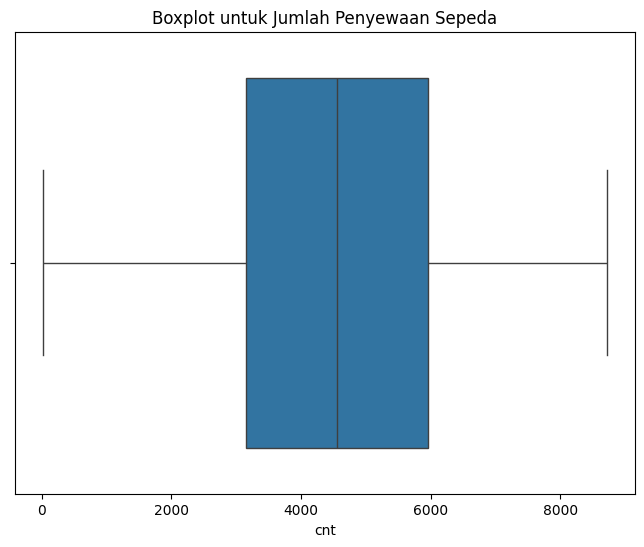

In [7]:
# Membuat boxplot untuk kolom 'cnt'
plt.figure(figsize=(8, 6))
sns.boxplot(x=day_df['cnt'])
plt.title('Boxplot untuk Jumlah Penyewaan Sepeda')
plt.show()

In [8]:
# Menghitung Z-Score untuk kolom 'cnt'
z_scores = np.abs(stats.zscore(day_df['cnt']))

# Menentukan threshold (contoh: Z-Score > 3 dianggap outlier)
threshold = 3
outliers = np.where(z_scores > threshold)

# Menampilkan baris yang merupakan outlier
day_df.iloc[outliers]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


**Insight:**
- Tidak terdapat missing value maupun duplikasi data pada dataframe
- Terdapat kesalahan tipe data untuk kolom dteday baik pada day_df
- Tidak terdapat outlier pada kolom cnt untuk total sepeda, ini dilihat pada boxplot dan perhitungan outlier dengan z score

### Cleaning Data

In [9]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- tipe data dari dteday pada day_df diubah menjadi tipe data datetime
- terdapat 16 kolom dengan berbagai tipe data sepertiint, float, dan datetime
- tidak ada data null dan duplicate data di setiap baris ataupun kolom pada kedua data
- terdapat total 731 baris data pada dataframe

## Exploratory Data Analysis (EDA)

In [11]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight** :  
- rata-rata dari sepeda yang dipinjam dalam sehari adalah 4,504 dalam sehari  
- rata-rata dari pengguna terdaftar lebih banyak dari pengguna casual sekitar 3,656 dalam sehari
- Season: Nilai rata-rata 2.49, menunjukkan bahwa sebagian besar data berasal dari musim kedua hingga ketiga (Spring hingga Summer).
- Weathersit: Nilai rata-rata 1.39, yang berarti cuaca umumnya adalah kondisi mendekati cerah atau cukup baik.
- Windspeed: Rata-rata nilai kecepatan angin adalah 0.19, dengan nilai tertinggi 0.50.

**Insight**: Pada kode berikut, jumlah penggunaan sepeda terbanyak itu pada hari kerja (1) baik pada tahun 2011 maupun tahun 2012.

In [12]:
# Filter untuk tahun 2011 dan 2012
filtered_df = day_df[(day_df['dteday'].dt.year >= 2011) & (day_df['dteday'].dt.year <= 2012)]

# Tambahkan kolom 'year' untuk mempermudah pengelompokan
filtered_df['yr'] = filtered_df['dteday'].dt.year

In [13]:
# agregasi berdasarkan 'weekday' dan 'year'
result_workday = (
    filtered_df.groupby(by=['workingday', 'yr'])
    .agg({
        "cnt": ["sum", "mean"]
    })
    .reset_index()
    .sort_values(by=('cnt', 'sum'), ascending=False)
)

result_workday

workingday    yr      cnt             
                        sum         mean
3          1  2012  1436146  5744.584000
2          1  2011   856264  3425.056000
1          0  2012   613430  5288.189655
0          0  2011   386839  3363.817391

In [14]:
result_workday.columns = ['workingday', 'year', 'cnt_sum', 'cnt_mean']

**Insight**: Pada kode berikut, ditemukan bahwa di tahun 2012 rata-rata terbanyak penyewaan sepeda jatuh di hari Thursday/Kamis dan di tahun 2011 itu pada hari Friday/Jumat.

In [15]:
# Lakukan agregasi berdasarkan 'weekday' dan 'year'
result_weekday = (
    filtered_df.groupby(by=['weekday', 'yr'])
    .agg({
        "cnt": ["sum", "mean"]
    })
    .reset_index()
    .sort_values(by=('cnt', 'sum'), ascending=False)
)

result_weekday

weekday    yr     cnt             
                     sum         mean
9        4  2012  310843  5977.750000
11       5  2012  305784  5880.461538
7        3  2012  303879  5843.826923
13       6  2012  298064  5732.000000
5        2  2012  288771  5553.288462
3        1  2012  275282  5194.000000
1        0  2012  266953  5036.849057
10       5  2011  182006  3500.115385
4        2  2011  180338  3468.038462
2        1  2011  180221  3465.788462
12       6  2011  179743  3391.377358
0        0  2011  177074  3405.269231
8        4  2011  174552  3356.769231
6        3  2011  169169  3253.250000

In [16]:
result_weekday.columns = ['weekday', 'year', 'cnt_sum', 'cnt_mean']

**Insight**:  
Pada kode berikut didapat:  
- jumlah pengguna registered lebih banyak dari pengguna casual baik di hari libur maupun hari kerja baik pada tahun 2012 dan tahun 2011.  
- jumlah pengguna casual mengalami peningkatan pada hari libur/nasional (0) baik di tahun 2012 dan tahun 2011.
- jumlah pengguna registered mengalami peningkatan pada hari kerja (1) baik di tahun 2012 dan tahun 2011.

In [17]:
result_user = filtered_df.groupby(by=['workingday', 'yr']).agg({
    'casual': ['sum', 'mean'],
    'registered': ['sum', 'mean'],
    'cnt': ['sum', 'mean']
}).reset_index().sort_values(by=('cnt', 'sum'), ascending=False)

result_user

workingday    yr  casual              registered                   cnt  \
                       sum         mean        sum         mean      sum   
3          1  2012  184931   739.724000    1251215  5004.860000  1436146   
2          1  2011  118354   473.416000     737910  2951.640000   856264   
1          0  2012  187834  1619.258621     425596  3668.931034   613430   
0          0  2011  128898  1120.852174     257941  2242.965217   386839   

                
          mean  
3  5744.584000  
2  3425.056000  
1  5288.189655  
0  3363.817391

In [18]:
result_user.columns = ['workingday', 'year', 'casual_sum', 'casual_mean', 'registered_sum', 'registered_mean', 'cnt_sum', 'cnt_mean']

**Insight**:  
Pada kode berikut ditemukan bahwa jumlah penyewaan sepeda terbanyak di tahun 2012 dan 2011 adalah pada musim gugur.

In [19]:
result_season = filtered_df.groupby(by=['season', 'yr']).agg({
    'cnt': ['sum', 'mean']
}).reset_index().sort_values(by=('cnt', 'sum'), ascending=False)

result_season

season    yr     cnt             
                   sum         mean
5      3  2012  641479  6824.244681
3      2  2012  571273  6209.489130
7      4  2012  515476  5791.865169
4      3  2011  419650  4464.361702
2      2  2011  347316  3775.173913
6      4  2011  326137  3664.460674
1      1  2012  321348  3531.296703
0      1  2011  150000  1666.666667

In [20]:
result_season.columns = ['season', 'year', 'cnt_sum', 'cnt_mean']

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada hari apa puncak penggunaan sepeda terjadi, lalu apakah ada pola yang berbeda antara hari kerja dan hari libur/akhir pekan?

In [21]:
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

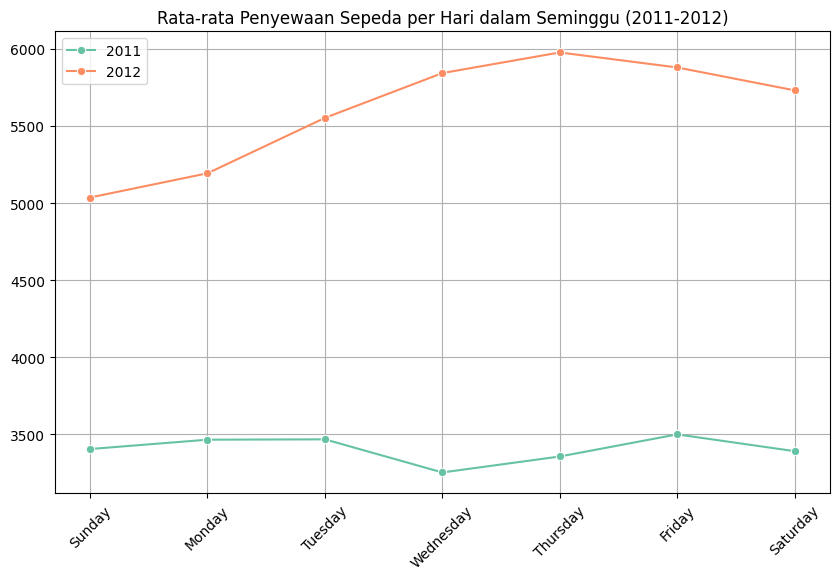

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=result_weekday,
    x='weekday',
    y='cnt_mean',
    hue='year',
    marker='o',
    palette='Set2'
)
plt.title('Rata-rata Penyewaan Sepeda per Hari dalam Seminggu (2011-2012)')
plt.xticks(ticks=range(7), labels=days, rotation=45, fontsize=10)
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title=None, fontsize=10)
plt.grid(True)
plt.show()

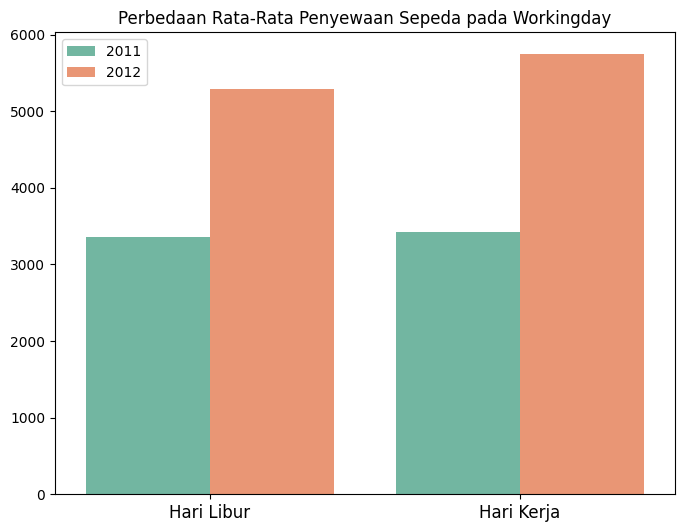

In [23]:
# Membuat barplot untuk melihat distribusi jumlah penyewaan pada hari kerja dan hari libur selama tahun 2011-2012
year_labels = ["2011", "2012"]
workday_label = ["Hari Libur", "Hari Kerja"]

plt.figure(figsize=(8, 6))
sns.barplot(x='workingday',
            y='cnt_mean',
            data=result_workday,
            hue='year',
            palette='Set2',
            errorbar=None)
plt.title('Perbedaan Rata-Rata Penyewaan Sepeda pada Workingday')
plt.xticks(ticks=range(2), labels=workday_label, fontsize=12)
plt.legend(labels=year_labels, fontsize=10)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Pertanyaan 2: Sejauh mana terdapat perbedaan pola penggunaan antara pengguna kasual dan pengguna terdaftar pada hari kerja dibandingkan akhir pekan?

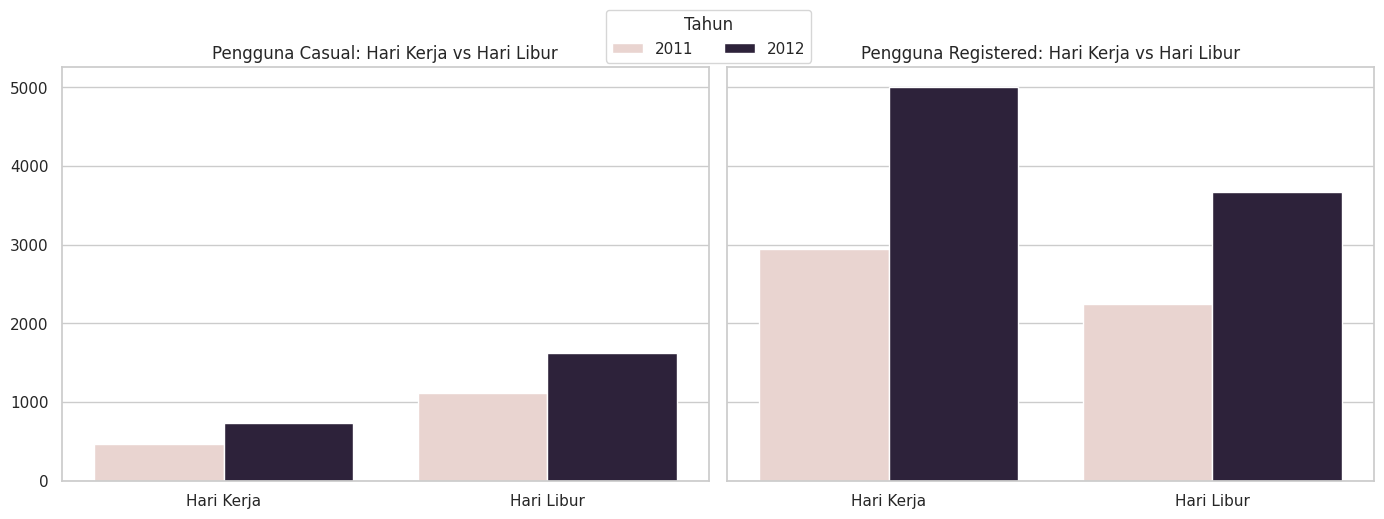

In [24]:
# Menambah kolom 'workingday_label' ke dalam DataFrame
result_user['workingday_label'] = result_user['workingday'].map({0: "Hari Libur", 1: "Hari Kerja"})

# Set gaya visualisasi
sns.set(style="whitegrid")

# Persiapkan figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot pengguna casual
sns.barplot(
    x='workingday_label',
    y='casual_mean',
    hue='year',
    data=result_user,
    errorbar=None,
    ax=axes[0]  # Arahkan plot ke subplot pertama
)
axes[0].set_title('Pengguna Casual: Hari Kerja vs Hari Libur')
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)

# Plot pengguna registered
sns.barplot(
    x='workingday_label',
    y='registered_mean',
    hue='year',
    data=result_user,
    errorbar=None,
    ax=axes[1]  # Arahkan plot ke subplot kedua
)
axes[1].set_title('Pengguna Registered: Hari Kerja vs Hari Libur')
axes[1].set_xlabel(None)
axes[1].set_ylabel('')  # Kosongkan karena sharey=True

axes[0].legend_.remove()
axes[1].legend_.remove()

# legend untuk figure secara keseluruhan
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='Tahun', bbox_to_anchor=(0.512, 1.05), ncol=2)

plt.tight_layout()
plt.show()

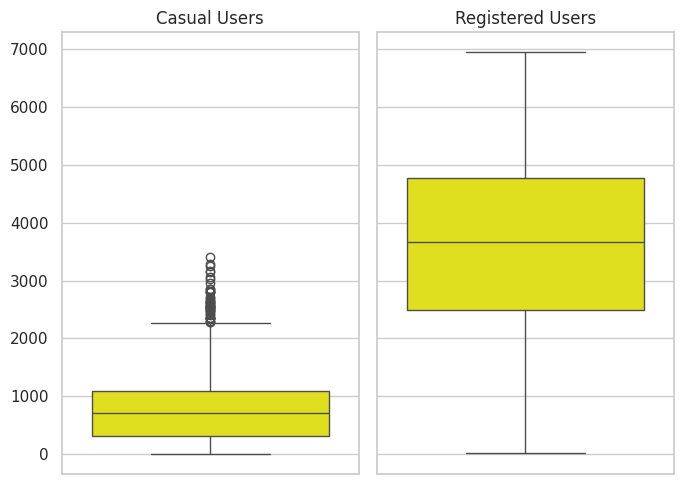

In [25]:
columns = ['casual', 'registered']
xlabel_names = ['Casual Users', 'Registered Users']

fig, axes = plt.subplots(1, 2, figsize=(7,5), sharey=True)


for col, ax, xlabel in zip(columns, axes, xlabel_names):
    sns.boxplot(day_df[col], ax=ax, color='yellow')
    ax.set_title(xlabel)
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

**Insight**:  
- Pengguna registered secara keseluruhan lebih sering menggunakan sepeda, dengan distribusi yang lebih konsisten.
- Pengguna casual menunjukkan variabilitas yang lebih besar, dengan beberapa individu menggunakan sepeda dalam jumlah yang sangat tinggi, yang mungkin terjadi pada hari-hari tertentu atau acara khusus.

### Pertanyaan 3: Bagaimana pola penggunaan sepeda berubah sepanjang musim (semi, panas, gugur, dan dingin)?

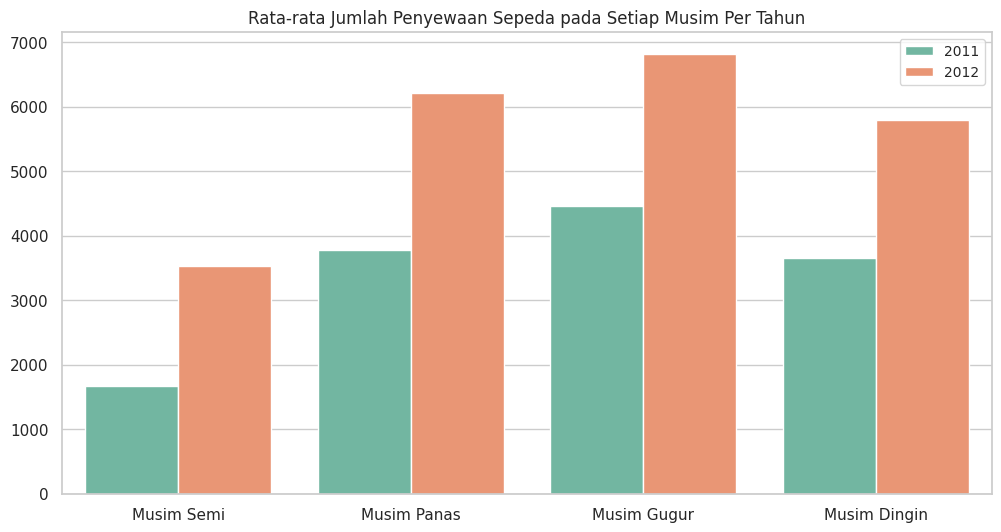

In [26]:
year_labels = ["2011", "2012"]

plt.figure(figsize=(12, 6))
sns.barplot(x='season',
            y='cnt_mean',
            data=result_season,
            hue="year",
            errorbar=None,
            palette='Set2')
plt.title('Rata-rata Jumlah Penyewaan Sepeda pada Setiap Musim Per Tahun')
plt.legend(labels=year_labels, fontsize=10)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks([0, 1, 2, 3], ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.show()

## Conclusion

- Conclusion pertanyaan 1:   
Puncak rata-rata penggunaan sepeda terjadi pada hari Jumat di tahun 2011 dan pada hari kamis di tahun 2012. Selain itu, tidak perbedaan signifikan yang terjadi antara hari kerja dan hari libur di tahun 2011, hanya berbeda sedikit saja, yaitu hari kerja sedikit lebih banyak. Sedangkan, di tahun 2012 lumayan terdapat perbedaan yang sedikit lebih banyak dibanding tahun sebelumnya, antara hari libur dan hari kerja, yaitu pada hari kerja lebih banyak penyewaan sepeda.
- Conclusion pertanyaan 2:  
Selama dua tahun tersebut, pengguna registered lebih banyak daripada pengguna casual. Selain itu, pengguna registered lebih banyak pada hari kerja dan pengguna casual lebih banyak pada hari libur dalam rentang dua tahun tersebut.
- Conclusion pertanyaan 3:  
Pada kedua tahun tersebut, rata-rata penyewaan sepeda dari musim semi ke musim gugur terus mengalami peningkatan, lalu mengalami penurunan di musim dingin. Selain itu, tren penyewaan sepeda mengalami peningkatan dari 2011 ke 2012 di setiap musim.